In [3]:
# import pandas as pd
# import streamlit as st
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# import plotly.express as px
# import numpy as np

In [4]:
# !pip install xgboost

In [5]:
# # 데이터 로드 및 전처리
# @st.cache_data
# def load_data():
#     data = pd.read_csv("../data/pm25_pm10_merged.csv")  # 파일 경로 수정 필요
#     data['Date'] = pd.to_datetime(data['Date'])
#     data['Month'] = data['Date'].dt.month  # 월 추가
#     return data

In [6]:
# # XGBoost 모델 학습 (도시별 모델)
# def train_model(data):
#     pivot_data = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)').reset_index().fillna(0)
#     pivot_data['Month'] = data.groupby('Date')['Month'].first().values
    
#     X = pivot_data[['Beijing', 'Month']]  # 입력 변수
#     target_cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']

#     # 도시별로 모델 학습
#     models = {}  # {city: model}
#     X_tests = {}
#     y_tests = {}

#     for city in target_cities:
#         y = pivot_data[city]  # 단일 열 타겟
#         if len(X) > 5:
#             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#             model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42, objective='reg:squarederror')
#             model.fit(X_train, y_train)
#             models[city] = model
#             X_tests[city] = X_test
#             y_tests[city] = y_test

#     return models, X_tests, y_tests, pivot_data
    

In [7]:
# # 예측 함수
# def predict_pm25(models, beijing_pm25, month):
#     input_value = [[beijing_pm25, month]]
#     predictions = {}
#     target_cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']
    
#     for city in target_cities:
#         predictions[city] = models[city].predict(input_value)[0]
    
#     predictions['Beijing'] = beijing_pm25
#     return predictions


In [8]:
# # 모델 스코어 계산 (교차 검증 포함)
# def score_model(models, X_tests, y_tests):
#     scores = {}
#     cv_scores = {}
    
#     for city in models.keys():
#         scores[city] = models[city].score(X_tests[city], y_tests[city])
#         cv_score = cross_val_score(models[city], X_tests[city], y_tests[city], cv=5, scoring='r2').mean()
#         cv_scores[city] = cv_score
    
#     return scores, cv_scores

In [9]:
# # 등급 계산 함수
# def get_grade(pm25):
#     if pm25 <= 15:
#         return "좋음", "green"
#     elif pm25 <= 35:
#         return "보통", "blue"
#     elif pm25 <= 75:
#         return "나쁨", "orange"
#     else:
#         return "매우 나쁨", "red"


In [10]:
# # 도시 좌표 딕셔너리
# city_coords = {
#     'Seoul': (37.5665, 126.978),
#     'Tokyo': (35.6895, 139.6917),
#     'Beijing': (39.9042, 116.4074),
#     'Delhi': (28.7041, 77.1025),
#     'Bangkok': (13.7563, 100.5018)
# }

In [11]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report

# # 데이터 로드 및 전처리
# def load_data():
#     data = pd.read_csv("../data/pm25_pm10_merged.csv")  # 파일 경로 수정 필요
#     data['Date'] = pd.to_datetime(data['Date'])
#     data['Month'] = data['Date'].dt.month  # 월 추가
#     return data

# # PM2.5 등급 변환 함수
# def pm25_to_grade(pm25):
#     if pm25 <= 15:
#         return '좋음'
#     elif pm25 <= 35:
#         return '보통'
#     elif pm25 <= 75:
#         return '나쁨'
#     else:
#         return '매우 나쁨'

# # XGBoost 모델 학습 및 평가 함수
# def train_and_evaluate(data):
#     pivot_data = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)').reset_index().fillna(0)
#     pivot_data['Month'] = data.groupby('Date')['Month'].first().values
    
#     X = pivot_data[['Beijing', 'Month']]  # 입력 변수
#     target_cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']

#     results = {}

#     for city in target_cities:
#         y = pivot_data[city]  # 타겟 변수
        
#         # PM2.5 값을 등급으로 변환
#         y_grade = np.array([pm25_to_grade(pm25) for pm25 in y])
        
#         # 레이블 인코딩 (등급을 숫자로 변환)
#         le = LabelEncoder()
#         le.fit(['좋음', '보통', '나쁨', '매우 나쁨'])  # 모든 등급을 명시적으로 지정하여 누락 방지
#         y_encoded = le.transform(y_grade)
        
#         # 디버깅: 클래스 값 확인
#         print(f"{city} 클래스 값 (학습 전):", np.unique(y_encoded))
        
#         # 데이터 분할
#         X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
        
#         # 디버깅: 학습 데이터의 클래스 값 확인
#         print(f"{city} 학습 데이터 클래스 값:", np.unique(y_train))
        
#         # XGBoost 모델 생성 및 학습
#         model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42,
#                               use_label_encoder=False, eval_metric='mlogloss')
#         model.fit(X_train, y_train)
        
#         # 예측 및 평가
#         y_pred = model.predict(X_test)
        
#         report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        
#         results[city] = {
#             "classification_report": classification_report(y_test, y_pred, target_names=le.classes_),
#             "precision": report["weighted avg"]["precision"],
#             "recall": report["weighted avg"]["recall"],
#             "f1-score": report["weighted avg"]["f1-score"]
#         }
    
#     return results

# # 데이터 로드
# data = load_data()

# # 모델 학습 및 평가
# results = train_and_evaluate(data)

# # 결과 출력
# for city in results.keys():
#     print(f"{city} 분류 결과:")
#     print(results[city]["classification_report"])


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 데이터 로드
data = pd.read_csv('../data/pm25_pm10_merged.csv')

# 필요한 도시만 선택
cities = ['Beijing', 'Seoul', 'Tokyo']
data = data[data['City'].isin(cities)]

# 날짜를 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 도시별로 데이터 피벗
data_pivoted = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)')

# NaN 값을 0으로 대체
data_pivoted = data_pivoted.fillna(0)

# 중국(베이징)의 PM2.5 데이터를 feature로 사용
X = data_pivoted['Beijing'].values.reshape(-1, 1)

# 서울과 도쿄의 PM2.5 데이터를 target으로 사용
y_seoul = data_pivoted['Seoul'].values
y_tokyo = data_pivoted['Tokyo'].values

# PM2.5 수치를 등급으로 변환하는 함수
def pm25_to_grade(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    else:
        return '나쁨'

# 등급으로 변환
y_seoul_grade = np.array([pm25_to_grade(pm25) for pm25 in y_seoul])
y_tokyo_grade = np.array([pm25_to_grade(pm25) for pm25 in y_tokyo])

# 레이블 인코딩
le = LabelEncoder()
y_seoul_encoded = le.fit_transform(y_seoul_grade)
y_tokyo_encoded = le.fit_transform(y_tokyo_grade)

# 데이터 분할
X_train, X_test, y_seoul_train, y_seoul_test, y_tokyo_train, y_tokyo_test = train_test_split(
    X, y_seoul_encoded, y_tokyo_encoded, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습 (서울)
xgb_seoul = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_seoul.fit(X_train, y_seoul_train)

# XGBoost 모델 생성 및 학습 (도쿄)
xgb_tokyo = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_tokyo.fit(X_train, y_tokyo_train)

# 예측
y_seoul_pred = xgb_seoul.predict(X_test)
y_tokyo_pred = xgb_tokyo.predict(X_test)

# 결과 출력
print("서울 분류 결과:")
print(classification_report(y_seoul_test, y_seoul_pred, target_names=le.classes_))

print("\n도쿄 분류 결과:")
print(classification_report(y_tokyo_test, y_tokyo_pred, target_names=le.classes_))


서울 분류 결과:
              precision    recall  f1-score   support

          나쁨       0.71      0.70      0.71       272
          보통       0.52      0.71      0.60       235
          좋음       0.99      0.64      0.77       236

    accuracy                           0.69       743
   macro avg       0.74      0.68      0.69       743
weighted avg       0.74      0.69      0.70       743


도쿄 분류 결과:
              precision    recall  f1-score   support

          나쁨       1.00      0.01      0.02        92
          보통       0.55      0.82      0.66       306
          좋음       0.74      0.61      0.67       345

    accuracy                           0.62       743
   macro avg       0.76      0.48      0.45       743
weighted avg       0.69      0.62      0.58       743



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



서울 혼동행렬:
[[191  81   0]
 [ 65 168   2]
 [ 12  74 150]]

도쿄 혼동행렬:
[[  1  74  17]
 [  0 251  55]
 [  0 135 210]]

서울 성능 지표:
정확도: 0.6851, 정밀도: 0.7389, 재현율: 0.6851, F1 스코어: 0.6950

도쿄 성능 지표:
정확도: 0.6218, 정밀도: 0.6943, 재현율: 0.6218, F1 스코어: 0.5836


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-

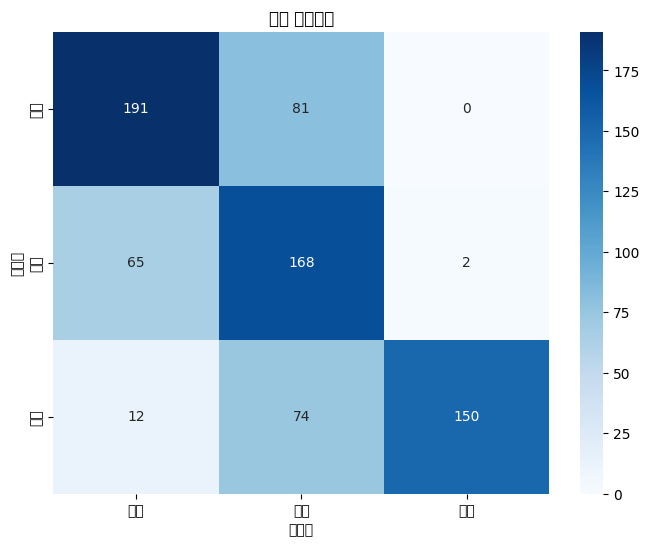

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-

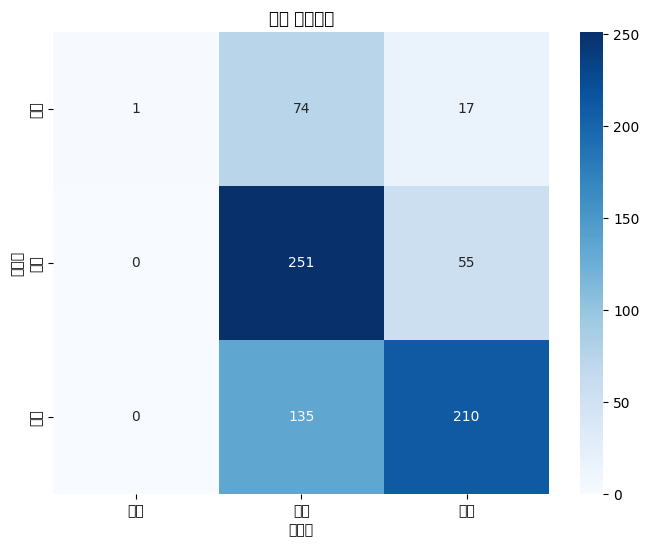

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 서울 혼동행렬 계산 및 출력
confusion_matrix_seoul = confusion_matrix(y_seoul_test, y_seoul_pred)
print("\n서울 혼동행렬:")
print(confusion_matrix_seoul)

# 도쿄 혼동행렬 계산 및 출력
confusion_matrix_tokyo = confusion_matrix(y_tokyo_test, y_tokyo_pred)
print("\n도쿄 혼동행렬:")
print(confusion_matrix_tokyo)

# 서울 성능 지표 계산 및 출력
accuracy_seoul = accuracy_score(y_seoul_test, y_seoul_pred)
precision_seoul = precision_score(y_seoul_test, y_seoul_pred, average='weighted')
recall_seoul = recall_score(y_seoul_test, y_seoul_pred, average='weighted')
f1_seoul = f1_score(y_seoul_test, y_seoul_pred, average='weighted')

print(f"\n서울 성능 지표:")
print(f"정확도: {accuracy_seoul:.4f}, 정밀도: {precision_seoul:.4f}, 재현율: {recall_seoul:.4f}, F1 스코어: {f1_seoul:.4f}")

# 도쿄 성능 지표 계산 및 출력
accuracy_tokyo = accuracy_score(y_tokyo_test, y_tokyo_pred)
precision_tokyo = precision_score(y_tokyo_test, y_tokyo_pred, average='weighted')
recall_tokyo = recall_score(y_tokyo_test, y_tokyo_pred, average='weighted')
f1_tokyo = f1_score(y_tokyo_test, y_tokyo_pred, average='weighted')

print(f"\n도쿄 성능 지표:")
print(f"정확도: {accuracy_tokyo:.4f}, 정밀도: {precision_tokyo:.4f}, 재현율: {recall_tokyo:.4f}, F1 스코어: {f1_tokyo:.4f}")

# 혼동행렬 시각화 (서울)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_seoul, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("서울 혼동행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# 혼동행렬 시각화 (도쿄)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_tokyo, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("도쿄 혼동행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 데이터 로드
data = pd.read_csv('../data/pm25_pm10_merged.csv')

# 필요한 도시만 선택
cities = ['Beijing', 'Bangkok', 'Delhi']
data = data[data['City'].isin(cities)]

# 날짜를 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 도시별로 데이터 피벗
data_pivoted = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)')

# NaN 값을 0으로 대체
data_pivoted = data_pivoted.fillna(0)

# 중국(베이징)의 PM2.5 데이터를 feature로 사용
X = data_pivoted['Beijing'].values.reshape(-1, 1)

# 방콕과 델리의 PM2.5 데이터를 target으로 사용
y_bangkok = data_pivoted['Bangkok'].values
y_delhi = data_pivoted['Delhi'].values

# PM2.5 수치를 등급으로 변환하는 함수
def pm25_to_grade(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    else:
        return '나쁨'

# 등급으로 변환
y_bangkok_grade = np.array([pm25_to_grade(pm25) for pm25 in y_bangkok])
y_delhi_grade = np.array([pm25_to_grade(pm25) for pm25 in y_delhi])

# 레이블 인코딩
le = LabelEncoder()
y_bangkok_encoded = le.fit_transform(y_bangkok_grade)
y_delhi_encoded = le.fit_transform(y_delhi_grade)

# 데이터 분할
X_train, X_test, y_bangkok_train, y_bangkok_test, y_delhi_train, y_delhi_test = train_test_split(
    X, y_bangkok_encoded, y_delhi_encoded, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습 (방콕)
xgb_bangkok = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_bangkok.fit(X_train, y_bangkok_train)

# XGBoost 모델 생성 및 학습 (델리)
xgb_delhi = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_delhi.fit(X_train, y_delhi_train)

# 예측
y_bangkok_pred = xgb_bangkok.predict(X_test)
y_delhi_pred = xgb_delhi.predict(X_test)

# 결과 출력 (방콕과 델리만 출력)
print("방콕 분류 결과:")
print(classification_report(y_bangkok_test, y_bangkok_pred, target_names=le.classes_))

print("\n델리 분류 결과:")
print(classification_report(y_delhi_test, y_delhi_pred, target_names=le.classes_))


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


방콕 분류 결과:
              precision    recall  f1-score   support

          나쁨       0.70      0.49      0.57       244
          보통       0.38      0.27      0.31       191
          좋음       0.59      0.85      0.70       308

    accuracy                           0.58       743
   macro avg       0.56      0.53      0.53       743
weighted avg       0.57      0.58      0.56       743


델리 분류 결과:
              precision    recall  f1-score   support

          나쁨       0.92      0.99      0.96       550
          보통       0.00      0.00      0.00        40
          좋음       0.97      0.97      0.97       153

    accuracy                           0.93       743
   macro avg       0.63      0.65      0.64       743
weighted avg       0.88      0.93      0.91       743



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


방콕 혼동행렬:
[[119  45  80]
 [ 41  51  99]
 [ 10  37 261]]

델리 혼동행렬:
[[546   0   4]
 [ 40   0   0]
 [  5   0 148]]

방콕 성능 지표:
정확도: 0.5801, 정밀도: 0.5743, 재현율: 0.5801, F1 스코어: 0.5590

델리 성능 지표:
정확도: 0.9341, 정밀도: 0.8844, 재현율: 0.9341, F1 스코어: 0.9083


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarni

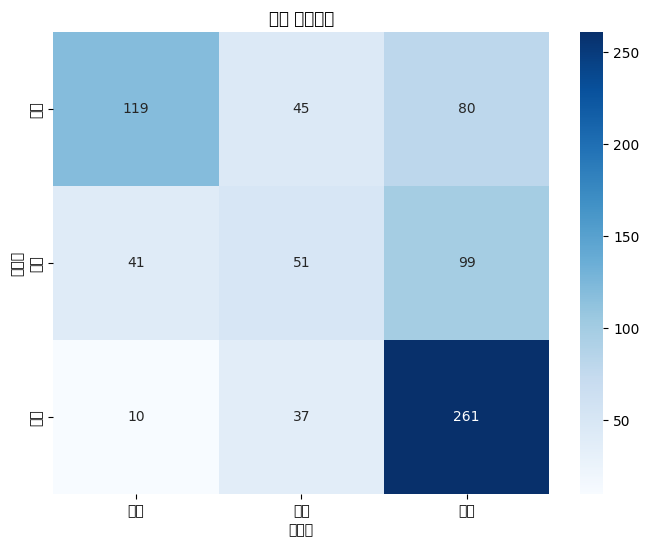

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-

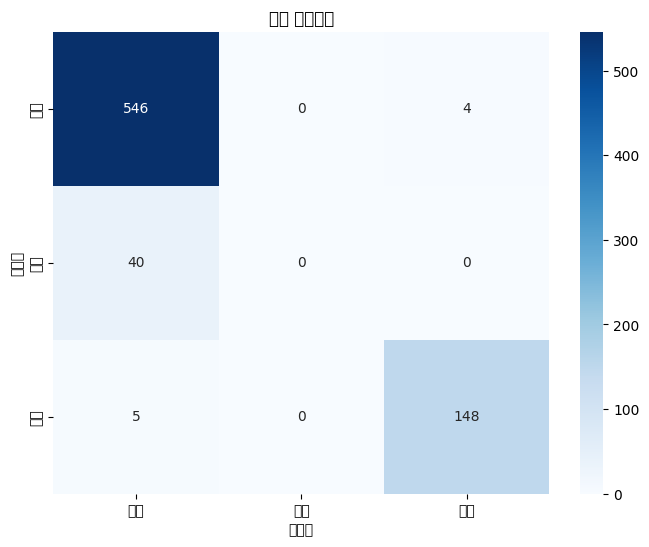

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬 계산 및 출력 (방콕)
confusion_matrix_bangkok = confusion_matrix(y_bangkok_test, y_bangkok_pred)
print("\n방콕 혼동행렬:")
print(confusion_matrix_bangkok)

# 혼동행렬 계산 및 출력 (델리)
confusion_matrix_delhi = confusion_matrix(y_delhi_test, y_delhi_pred)
print("\n델리 혼동행렬:")
print(confusion_matrix_delhi)

# 방콕 성능 지표 계산 및 출력
accuracy_bangkok = accuracy_score(y_bangkok_test, y_bangkok_pred)
precision_bangkok = precision_score(y_bangkok_test, y_bangkok_pred, average='weighted')
recall_bangkok = recall_score(y_bangkok_test, y_bangkok_pred, average='weighted')
f1_bangkok = f1_score(y_bangkok_test, y_bangkok_pred, average='weighted')

print(f"\n방콕 성능 지표:")
print(f"정확도: {accuracy_bangkok:.4f}, 정밀도: {precision_bangkok:.4f}, 재현율: {recall_bangkok:.4f}, F1 스코어: {f1_bangkok:.4f}")

# 델리 성능 지표 계산 및 출력
accuracy_delhi = accuracy_score(y_delhi_test, y_delhi_pred)
precision_delhi = precision_score(y_delhi_test, y_delhi_pred, average='weighted')
recall_delhi = recall_score(y_delhi_test, y_delhi_pred, average='weighted')
f1_delhi = f1_score(y_delhi_test, y_delhi_pred, average='weighted')

print(f"\n델리 성능 지표:")
print(f"정확도: {accuracy_delhi:.4f}, 정밀도: {precision_delhi:.4f}, 재현율: {recall_delhi:.4f}, F1 스코어: {f1_delhi:.4f}")

# 혼동행렬 시각화 (방콕)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_bangkok, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("방콕 혼동행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# 혼동행렬 시각화 (델리)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_delhi, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("델리 혼동행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()



